In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import cufflinks as cf
from sklearn.decomposition import PCA
from pycaret.clustering import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("preprocessed.csv")
df

,Unnamed: 0,Freelancer Name,Total_Feedback_Received,Freelancer Type,Member,Rating,Location,Annual Earnings,All-Time Earnings,Transactions Completed,...,Skills,New_All_Time_Earning,New_Transactions_Complete,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Emp_to_Feedback_Ratio,Weighted_Rating
0,0,Scopic,319.0,Team,Yes,100%,"Rutland, MA, USA","1,299,342",$6.3M,"11,135",...,"['PHP', 'Responsive Design', 'Design', 'JavaSc...",6300000.0,11135,565.78,250,750,24,26,1.263323,5.0
1,1,NIX Solutions Ltd,172.0,Individual,Yes,100%,"Kfar Saba, Tel Aviv, Israel","420,802",$2.4M,"3,322",...,"['JavaScript', '.NET', 'ASP.NET', 'C#', 'Desig...",2400000.0,3322,722.46,0,1000,25,40,0.825581,5.0
2,2,Emil Alexandrescu,NaN,Individual,Yes,100%,"Bucuresti, Bucuresti, Romania","293,258",$440K,184,...,"['Angular', 'Go', 'Graphql', 'JavaScript', 'Mo...",440000.0,184,2391.30,55,55,70,70,0.000000,5.0
3,3,Top Guru Assistants,256.0,Individual,Yes,100%,"Laguna Beach, CA, USA","277,468",$733K,926,...,"['Software Development', 'JSON', 'Android', 'i...",733000.0,926,791.58,0,2000,20,30,1.035156,5.0
4,4,YanBin Pang,4.0,Individual,Yes,100%,"Dandong, Liaoning, China","255,973",$392K,95,...,"['Angular', 'Node.js', 'PHP', 'Python', 'React...",392000.0,95,4126.32,25,25,50,50,0.500000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,5982,JMAC25,NaN,Individual,No,NaN,"Burleson, TX, USA",0,$0,0,...,"['Analysis', 'Excel', 'Logistics', 'Technical ...",0.0,0,NaN,25,25,5,5,NaN,0.0
5983,5983,David Kalcher,NaN,Individual,No,NaN,"Shanklin, Isle of Wight, United Kingdom",0,$0,0,...,[],0.0,0,NaN,25,25,5,5,NaN,0.0
5984,5984,Kitz Production,NaN,Individual,No,NaN,"PORTLAND, OR, USA",0,$0,0,...,"['Sound Design', 'Music Production', 'Sound Pr...",0.0,0,NaN,150,150,150,150,NaN,0.0
5985,5985,KoyaAi,NaN,Individual,No,NaN,"General Santos, General Santos, Philippines",0,$0,0,...,"['Technical Support', 'Keyword Research', 'Res...",0.0,0,NaN,30,30,8,8,NaN,0.0


### Subset Data

In [4]:
df2 = df[['Average Earnings', "Min_Starting_Rate", "Max_Starting_Rate", "Min_Hourly_Rate", "Max_Hourly_Rate", "Weighted_Rating"]]
df2

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating
0,565.78,250,750,24,26,5.0
1,722.46,0,1000,25,40,5.0
2,2391.30,55,55,70,70,5.0
3,791.58,0,2000,20,30,5.0
4,4126.32,25,25,50,50,5.0
...,...,...,...,...,...,...
5982,NaN,25,25,5,5,0.0
5983,NaN,25,25,5,5,0.0
5984,NaN,150,150,150,150,0.0
5985,NaN,30,30,8,8,0.0


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987 entries, 0 to 5986
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Earnings   5398 non-null   float64
 1   Min_Starting_Rate  5987 non-null   int64  
 2   Max_Starting_Rate  5987 non-null   int64  
 3   Min_Hourly_Rate    5987 non-null   int64  
 4   Max_Hourly_Rate    5987 non-null   int64  
 5   Weighted_Rating    5987 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 280.8 KB


In [6]:
df2.isna().sum()

Average Earnings     589
Min_Starting_Rate      0
Max_Starting_Rate      0
Min_Hourly_Rate        0
Max_Hourly_Rate        0
Weighted_Rating        0
dtype: int64

In [7]:
df2['Average Earnings'] = df2['Average Earnings'].replace(np.nan, 0)

In [8]:
df2.isna().sum()

Average Earnings     0
Min_Starting_Rate    0
Max_Starting_Rate    0
Min_Hourly_Rate      0
Max_Hourly_Rate      0
Weighted_Rating      0
dtype: int64

In [9]:
df2

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating
0,565.78,250,750,24,26,5.0
1,722.46,0,1000,25,40,5.0
2,2391.30,55,55,70,70,5.0
3,791.58,0,2000,20,30,5.0
4,4126.32,25,25,50,50,5.0
...,...,...,...,...,...,...
5982,0.00,25,25,5,5,0.0
5983,0.00,25,25,5,5,0.0
5984,0.00,150,150,150,150,0.0
5985,0.00,30,30,8,8,0.0


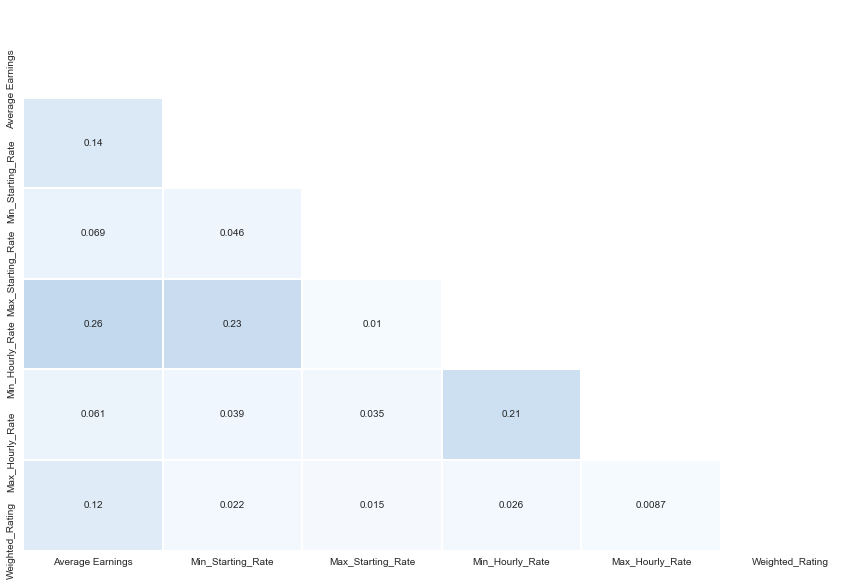

In [10]:
def correlation_plot(df2):
    
    corr = abs(df2.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (15,10))  # setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()
    
correlation_plot(df2)

In [11]:
df2.columns

Index(['Average Earnings', 'Min_Starting_Rate', 'Max_Starting_Rate',
       'Min_Hourly_Rate', 'Max_Hourly_Rate', 'Weighted_Rating'],
      dtype='object')

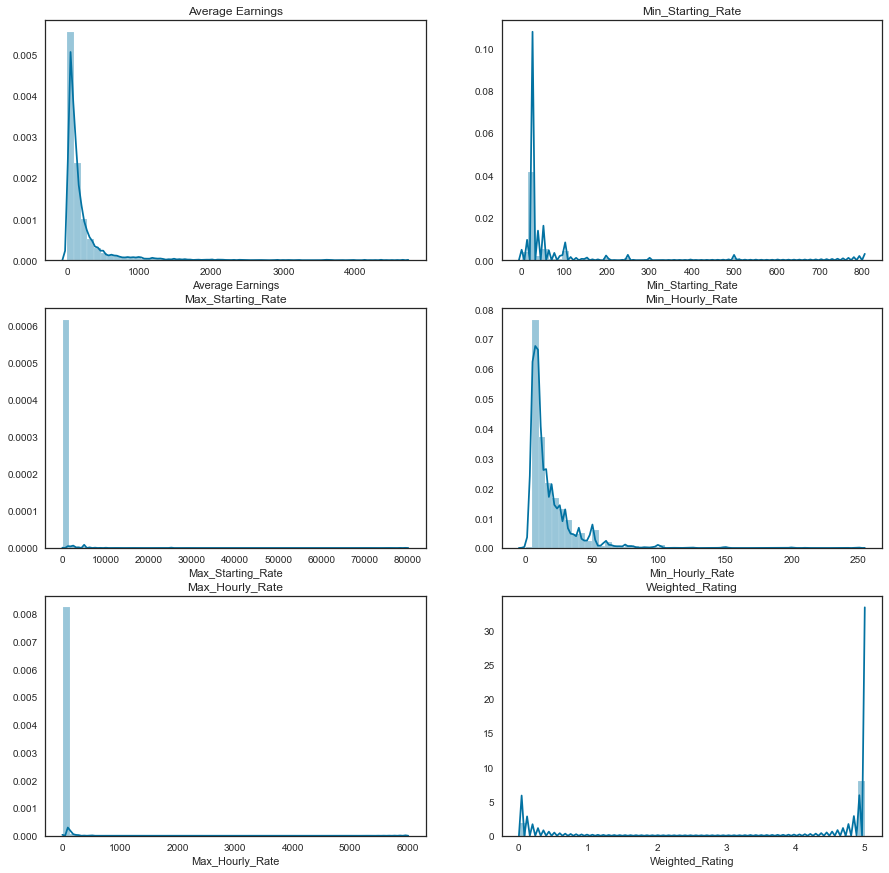

In [12]:
position = 1
plt.figure(figsize=(15,15))

for column in ['Average Earnings', 'Min_Starting_Rate', 'Max_Starting_Rate', 'Min_Hourly_Rate', 'Max_Hourly_Rate', 'Weighted_Rating']:    
    plt.subplot(3,2,position)
    sns.distplot(df2[column])
    plt.title(column)        
    position += 1
plt.show() 

In [13]:
def detect_col_outliers(ls_data):
     # z_score and filter

    mean = np.mean(ls_data)
    std = np.std(ls_data)
   
    return [i for i in ls_data if np.abs(i-mean) > 4*std]

features_outliers = ['Average Earnings', 'Min_Starting_Rate', 'Max_Starting_Rate',
       'Min_Hourly_Rate', 'Max_Hourly_Rate', 'Weighted_Rating']

for name_col in features_outliers:
    rtdo = detect_col_outliers(df2[name_col])
    print('-'*50)
    print(name_col)
    print('# values outlier: ', len(rtdo))
    print('{0:.2f}% of the total data'.format(100*len(rtdo)/df2.shape[0]))

--------------------------------------------------
Average Earnings
# values outlier:  71
1.19% of the total data
--------------------------------------------------
Min_Starting_Rate
# values outlier:  116
1.94% of the total data
--------------------------------------------------
Max_Starting_Rate
# values outlier:  10
0.17% of the total data
--------------------------------------------------
Min_Hourly_Rate
# values outlier:  62
1.04% of the total data
--------------------------------------------------
Max_Hourly_Rate
# values outlier:  6
0.10% of the total data
--------------------------------------------------
Weighted_Rating
# values outlier:  0
0.00% of the total data


### Scaling & Normalize Dataset

In [14]:
df_scaled = StandardScaler().fit_transform(df2)
normalized_df = pd.DataFrame(df_scaled)

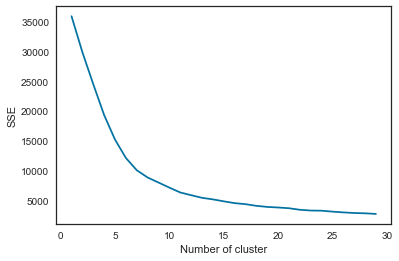

In [60]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Silhouette Plot for KMeans Clustering

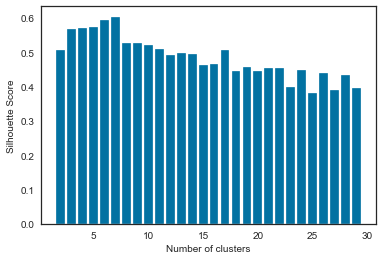

In [61]:
silhouette_scores = [] 

for n_cluster in range(2, 30):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [62]:
round(silhouette_score(normalized_df, KMeans(n_clusters = 3).fit_predict(normalized_df)), 2)

0.57

#### We choose 3 as the optimal number of clusters as it gives the highest silhouette score and also comparable inertia value. The cluster errors are almost similar and also, the slope of the line is almost constant as well.

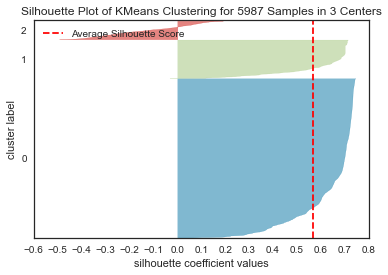

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5987 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(normalized_df)        # Fit the data to the visualizer
visualizer.show() 

### Proceeding with KMeans Clustering

In [64]:
KMeans= KMeans(3)
KMeans.fit(normalized_df)
labels=KMeans.labels_

In [65]:
clusters=pd.concat([df2, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating,cluster
0,565.78,250,750,24,26,5.0,0
1,722.46,0,1000,25,40,5.0,1
2,2391.30,55,55,70,70,5.0,0
3,791.58,0,2000,20,30,5.0,1
4,4126.32,25,25,50,50,5.0,0


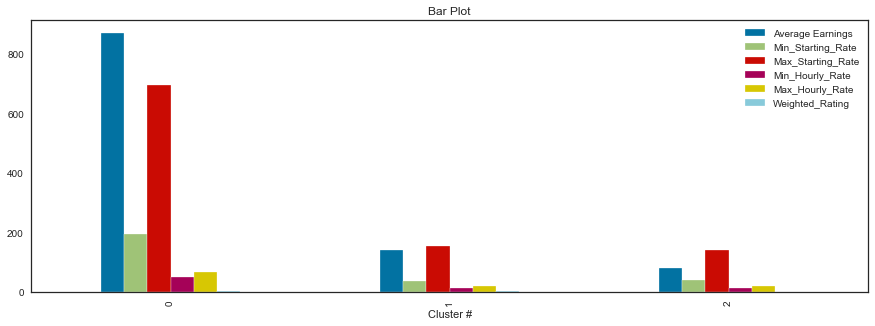

In [66]:
(clusters[['Average Earnings', 'Min_Starting_Rate', 'Max_Starting_Rate', 'Min_Hourly_Rate', 'Max_Hourly_Rate', 'Weighted_Rating', 'cluster']].groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Bar Plot')
plt.xlabel('Cluster #');

In [67]:
gk = clusters.groupby('cluster')
gk.get_group(0)

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating,cluster
0,565.78,250,750,24,26,5.00,0
2,2391.30,55,55,70,70,5.00,0
4,4126.32,25,25,50,50,5.00,0
5,2186.53,0,5,70,150,5.00,0
7,3630.43,65,65,80,80,4.95,0
...,...,...,...,...,...,...,...
5888,0.00,360,360,45,45,0.00,0
5900,0.00,500,500,75,75,0.00,0
5910,0.00,0,1,200,200,0.00,0
5927,179.00,430,500,30,30,0.00,0


In [68]:
gk.get_group(1)

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating,cluster
1,722.46,0,1000,25,40,5.00,1
3,791.58,0,2000,20,30,5.00,1
6,612.24,25,25,15,20,4.75,1
8,785.34,0,5000,20,25,4.95,1
10,859.03,25,500,14,18,5.00,1
...,...,...,...,...,...,...,...
5133,1.00,25,25,10,15,5.00,1
5134,52.67,30,60,15,15,5.00,1
5135,1.00,25,25,8,8,5.00,1
5136,1.00,250,250,5,10,5.00,1


In [69]:
gk.get_group(2)

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating,cluster
371,370.37,0,1,80,80,0.00,2
503,1553.75,25,25,18,18,0.00,2
856,460.00,0,1,60,70,0.45,2
938,802.67,25,25,25,25,0.00,2
996,1080.00,0,5,40,40,0.00,2
...,...,...,...,...,...,...,...
5981,0.00,25,25,5,9,0.00,2
5982,0.00,25,25,5,5,0.00,2
5983,0.00,25,25,5,5,0.00,2
5985,0.00,30,30,8,8,0.00,2


In [79]:
pca= PCA(n_components= 2)

pca.fit(normalized_df)
pca_features=pca.transform(normalized_df)

print(pca_features.shape)

pca_df = pd.DataFrame(data=pca_features,columns=['pca1','pca2'])

fin_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

(5987, 2)


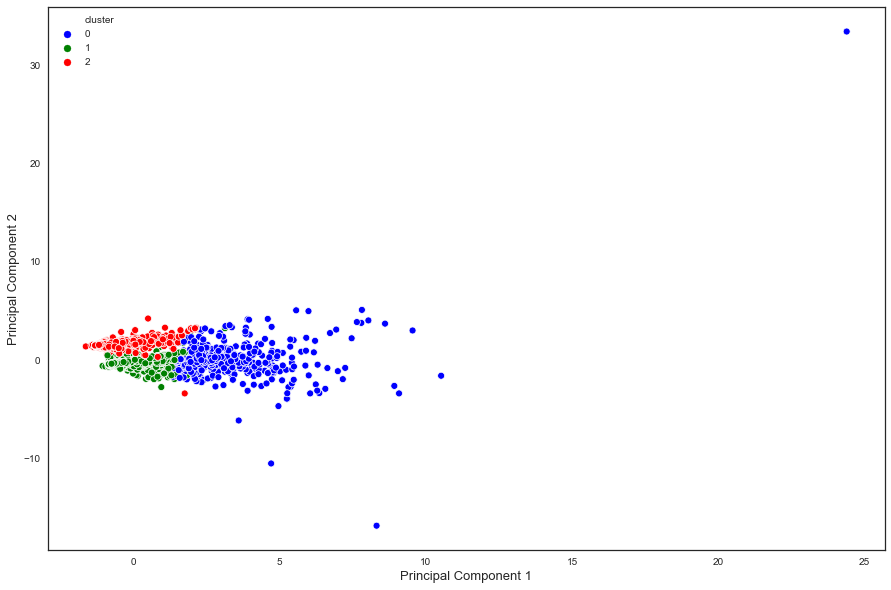

In [80]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=fin_df, palette=['blue','green', 'red'])
plt.xlabel('Principal Component 1', fontsize=13)
plt.ylabel('Principal Component 2', fontsize=13)
plt.show()

### Agglomerative Clustering

In [81]:
pca_df

,pca1,pca2
0,1.928722,-0.585772
1,0.912013,-0.800132
2,5.013158,-1.184913
3,0.910789,-1.179232
4,6.566568,-2.963843
...,...,...
5982,-1.303741,1.454151
5983,-1.303741,1.454151
5984,4.599500,4.161732
5985,-1.168295,1.510928


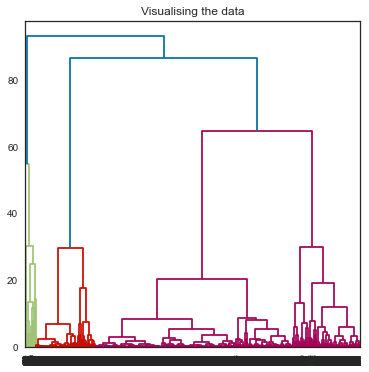

In [87]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(pca_df, method ='ward'))) 

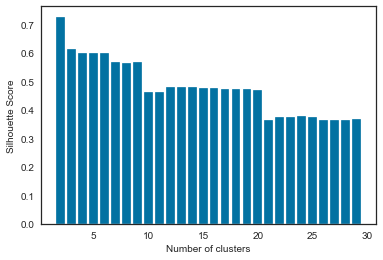

In [82]:
silhouette_scores = [] 

for n_cluster in range(2, 30):
    silhouette_scores.append( 
        silhouette_score(pca_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(pca_df))) 
    
# Plotting a bar graph to compare the results 
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [83]:
agg = AgglomerativeClustering(3)
agg.fit(pca_df)
labels=agg.labels_

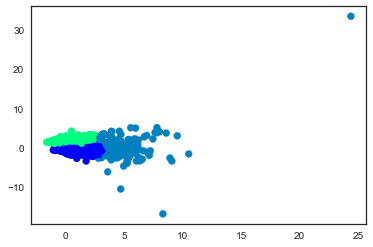

In [84]:
# Visualizing the clustering 
plt.scatter(pca_df['pca1'], pca_df['pca2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(pca_df), cmap =plt.cm.winter) 
plt.show() 

In [85]:
clusters2=pd.concat([df2, pd.DataFrame({'cluster': labels})], axis=1)
clusters2.head()

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating,cluster
0,565.78,250,750,24,26,5.0,0
1,722.46,0,1000,25,40,5.0,0
2,2391.30,55,55,70,70,5.0,1
3,791.58,0,2000,20,30,5.0,0
4,4126.32,25,25,50,50,5.0,1


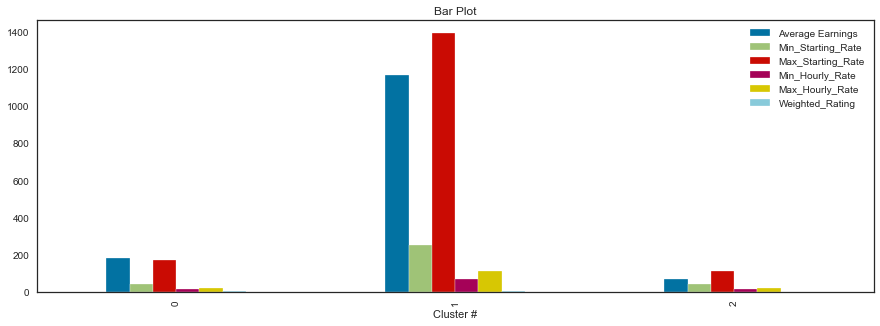

In [86]:
(clusters2[['Average Earnings', 'Min_Starting_Rate', 'Max_Starting_Rate', 'Min_Hourly_Rate', 'Max_Hourly_Rate', 'Weighted_Rating', 'cluster']].groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Bar Plot')
plt.xlabel('Cluster #');

### DBSCAN

In [16]:
exp_name = setup(data = df2, normalize=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,2010
1,Original Data,"(5987, 6)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(5987, 6)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [19]:
dbscan = create_model('dbscan')

,Metric
Silhouette,0.4622
Calinski-Harabasz,202.5124
Davies-Bouldin,1.4519


In [20]:
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [24]:
dbscan_df = assign_model(dbscan)

In [28]:
plot_model(dbscan, plot = 'cluster')

In [30]:
plot_model(dbscan, plot = 'distribution')

In [34]:
dbscan_df

,Average Earnings,Min_Starting_Rate,Max_Starting_Rate,Min_Hourly_Rate,Max_Hourly_Rate,Weighted_Rating,Cluster
0,565.78,250,750,24,26,5.0,Cluster 8
1,722.46,0,1000,25,40,5.0,Cluster 0
2,2391.30,55,55,70,70,5.0,Cluster -1
3,791.58,0,2000,20,30,5.0,Cluster -1
4,4126.32,25,25,50,50,5.0,Cluster -1
...,...,...,...,...,...,...,...
5982,0.00,25,25,5,5,0.0,Cluster 4
5983,0.00,25,25,5,5,0.0,Cluster 4
5984,0.00,150,150,150,150,0.0,Cluster -1
5985,0.00,30,30,8,8,0.0,Cluster 4


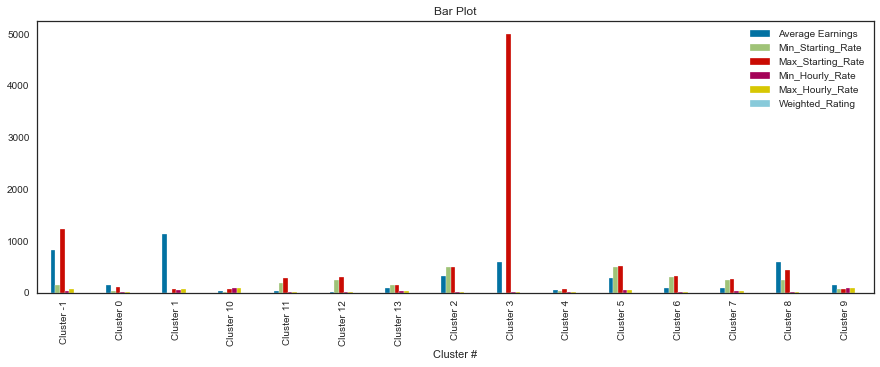

In [35]:
(dbscan_df[['Average Earnings', 'Min_Starting_Rate', 'Max_Starting_Rate', 'Min_Hourly_Rate', 'Max_Hourly_Rate', 'Weighted_Rating', 'Cluster']].groupby('Cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Bar Plot')
plt.xlabel('Cluster #');